# S02 T04: Pràctica amb programació numèrica
**Descripció:**
**_Familiaritza't amb la Programació Numèrica a través de la llibreria NumPy._**

## Exercici 1
**Crea una funció que donat un Array d’una dimensió, et faci un resum estadístic bàsic de les dades. Si detecta que l’array té més d’una dimensió, ha de mostrar un missatge d’error.**

In [21]:
import numpy as np
def stats (arr):
    if arr.ndim == 1:
        print ('The random array is:', arr)
        print ('The minimum value of the array is {} and the maximum {}'.format(arr.min(), arr.max()))
        print ('The sum of the array is {} and the mean is {}'.format(arr.sum(), arr.mean()))    
    else:
        print('Only an array of 1 dimension is allowed in this exercise')
    
arr = np.array(np.random.randint(10, size=[10]))
stats(arr)

The random array is: [5 8 2 0 9 7 5 4 6 0]
The minimum value of the array is 0 and the maximum 9
The sum of the array is 46 and the mean is 4.6


With Pandas library we could have use .describe to get easily several statictics results.

## Exercici 2
**Crea una funció que et generi un quadrat NxN de nombres aleatoris entre el 0 i el 100.**

In [11]:
def sq_array(array_size):
    sq_array = np.array(np.random.randint(100, size=(array_size, array_size)))
    return sq_array

rand_size  = np.random.randint(10) # Calculate the matriz size(N) randomly
array_2D = sq_array(rand_size) # We could print the array on the function but we storage it for the next exercise
print (array_2D)

[[35 17 45 51 31]
 [48 62 54 52 43]
 [ 4 44  5 83 70]
 [68 64  3 22 35]
 [ 1 38 69 56 39]]


## Exercici 3
**Crea una funció que donada una taula de dues dimensions, et calculi els totals per fila i els totals per columna.**

In [17]:
def sum_row_column (array):
    if array.ndim == 2:
        #for x, y in array.ndim():
        sum_rows = np.sum(array, axis = 1)
        sum_columns = np.sum(array, axis = 0)
        print('The sum of each row elements are', ', '.join(map(str, sum_rows)))     
        print('The sum of each column elements are', ', '.join(map(str, sum_columns)))     
    else:
        print ('The array MUST have 2 dimensions')

sum_row_column(array_2D)

The sum of each row elements are 179, 259, 206, 192, 203
The sum of each column elements are 156, 225, 176, 264, 218


## Exercici 4
**Implementa manualment una funció que calculi el coeficient de correlació. Informa’t-en sobre els seus usos i interpretació.**

**¿Qué es la correlación?**
La correlación es una medida estadística que expresa hasta qué punto dos variables están relacionadas. Es una herramienta común para describir relaciones simples sin hacer afirmaciones sobre causa y efecto.

El **coeficiente de correlación** mide el grado de intensidad de esta posible relación entre las variables. Su valor va desde -1 a +1 y se indica mediante la letra **r**. 
 * Cuanto más se aproxima r a cero, más débil es la relación lineal.
 * Los valores de r positivos indican una correlación positiva, en la que los valores de ambas variables tienden a incrementarse juntos.
 * Los valores de r negativos indican una correlación negativa, en la que los valores de una variable tienden a incrementarse mientras que los valores de la otra variable descienden.

El coeficiente de correlación lineal se calcula aplicando la siguiente fórmula:

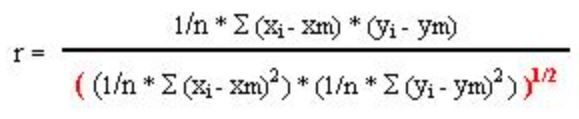

donde:
 - n es el tamaño de la muestra
 - Xi es cada uno de los valores de la primera variable
 - Xm es la media de la primera variable
 - Yi es cada uno de los valores de la segunda variable
 - Ym es la media de la segunda variable

[web]: https://www.aulafacil.com/cursos/estadisticas/gratis/coeficiente-de-correlacion-lineal-l11224
Pongamos un ejemplo:
Imaginemos que tenemos el peso y la altura de 30 alumnos y queremos conocer el coeficiende de correlación lineal para ver si ambas variables tiener relación. Datos del ejemplo extraidos de esta [web]

In [54]:
peso = np.array([32,33,34,30,32,35,34,32,32,35,33,35,34,30,33,34,35,32,33,33,33,34,34,31,32,34,34,31,35,34]) # lista de pesos de 30 alumnos
altura = np.array([1.25,1.28,1.27,1.21,1.22,1.29,1.30,1.24,1.27,1.29,1.25,1.28,1.27,1.21,1.22,1.29,1.30,1.24,1.27,1.29,1.25,1.28,1.27,1.21,1.22,1.29,1.30,1.24,1.27,1.29]) # lista de altura de 30 alumnos

# Calculos del coeficiente de correlacion
n = peso.size
xm, ym = peso.mean(), altura.mean()
xi_xm = peso - xm
yi_ym = altura - ym
numerador = 1/n*np.sum(xi_xm*yi_ym)
denominador = ((1/n*np.sum(xi_xm**2))*(1/n*np.sum(yi_ym**2)))**0.5
r= numerador / denominador

#Impresion de resultados
print ('En nuestro ejemplo tenemos 2 listas. La primera con el peso de los alumnos y la segunda con su altura')
print ('Los pesos de los alumnos son', peso)
print ('Las alturas de los alumnos son', altura)
print ('La media de peso(Xm) es {}, mientras que la media de altura(Ym) es {}.'.format(xm,ym))
print ('En este ejemplo, la muestra tiene {} relaciones peso-altura (n).'.format(n))
print ('El coeficiente de correlación (r) es {:.5f}'.format(r))
print ('Para comprobar que los calculos utilizamos el función de coeficiente de correlación de numpy que da ', np.corrcoef(peso,altura))

En nuestro ejemplo tenemos 2 listas. La primera con el peso de los alumnos y la segunda con su altura
Los pesos de los alumnos son [32 33 34 30 32 35 34 32 32 35 33 35 34 30 33 34 35 32 33 33 33 34 34 31
 32 34 34 31 35 34]
Las alturas de los alumnos son [1.25 1.28 1.27 1.21 1.22 1.29 1.3  1.24 1.27 1.29 1.25 1.28 1.27 1.21
 1.22 1.29 1.3  1.24 1.27 1.29 1.25 1.28 1.27 1.21 1.22 1.29 1.3  1.24
 1.27 1.29]
La media de peso(Xm) es 33.1, mientras que la media de altura(Ym) es 1.262.
En este ejemplo, la muestra tiene 30 relaciones peso-altura (n).
El coeficiente de correlación (r) es 0.82819
Para comprobar que los calculos utilizamos el función de coeficiente de correlación de numpy que da  [[1.         0.82818752]
 [0.82818752 1.        ]]


La correlación es bastante alta lo que demuestra que existe una relacion entre altura y peso en estos alumnos.

Las correlaciones se observan mejor con gráficas de modo que realizamos la representación gráfica de los datos y su linea de regresión.

<function matplotlib.pyplot.show(close=None, block=None)>

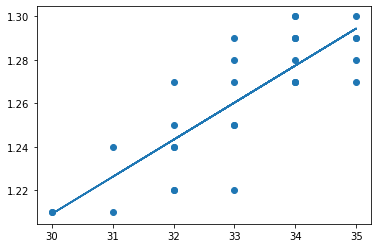

In [65]:
from matplotlib import pyplot as plt
plt.scatter(peso, altura)              # Scatter plot 
m, b = np.polyfit(peso, altura, 1)     # Calculate slope(m) & intercept(b)
plt.plot(peso, m*peso+b)               # Add linear correlation
plt.show